 Universidade Federal de Minas Gerais
 # Targets
 

 Arthur Phillip Ferreira da Silva
 
 Gabriel Almeida de Jesus

 Bibliotecas utilizadas

In [166]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


 Importando imagem base em escala de cinza

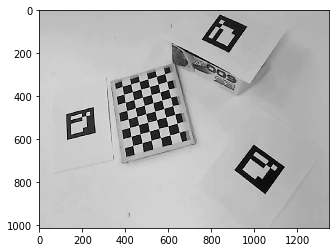

In [167]:
image = cv.imread('cena1.png')
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')


 Fazendo a binarização da imagem

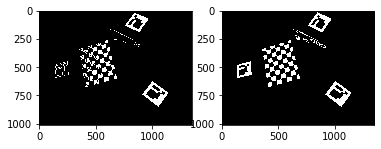

In [180]:
(T, binary) = cv.threshold(gray, 50, 255, cv.THRESH_BINARY_INV)
(H, compare) = cv.threshold(gray, 50, 255, cv.THRESH_BINARY_INV)

fig, (img1, img2) = plt.subplots(1, 2)

img1.imshow(binary, cmap='gray')
img2.imshow(compare, cmap='gray')

 Detectando bordas

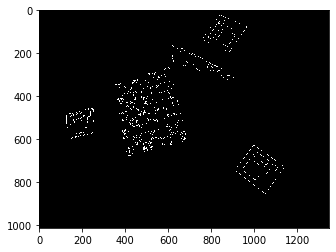

In [169]:
edges = cv.Canny(binary,100,200)

plt.imshow(edges, cmap='gray')

 Detectando quinas

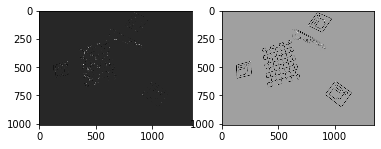

In [184]:
imggray = np.float32(binary)
imggrayCRN = np.float32(compare)

corners = cv.cornerHarris(imggray,3,3,0.04)
compareCRN = cv.cornerHarris(imggrayCRN,3,25,0.04)

fig, (crn1, crn2) = plt.subplots(1, 2)

crn1.imshow(corners, cmap='gray')
crn2.imshow(compareCRN, cmap='gray')

Formando os quadrilateros

In [164]:
print(corners.shape[0])
print(corners.shape[1])


#for altura in range(image.shape[0]):
#    for largura in range(image.shape[1]):
#        (r, g, b) = image[altura, largura]
        
    

1012
1349


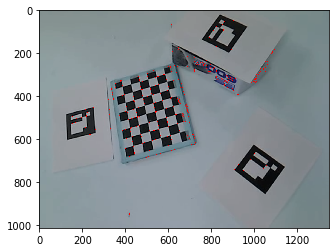

In [75]:
image[corners>0.01*corners.max()]=[255,0,0]

plt.imshow(image, cmap='gray')

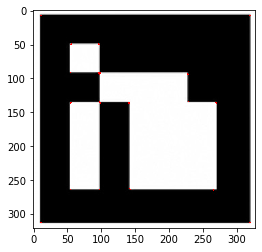

In [45]:
target = cv.imread('alvo.jpg')
t_gray = cv.cvtColor(target,cv.COLOR_BGR2GRAY)
(T, t_bin) = cv.threshold(t_gray, 100, 200, cv.THRESH_BINARY_INV)
t_gray = np.float32(t_bin)
t_corners = cv.cornerHarris(t_gray,2,3,0.04)
target[t_corners>0.01*t_corners.max()]=[255,0,0]

plt.imshow(target, cmap='gray')

In [52]:
cv.findHomography( t_corners, corners, cv.CV_RANSAC)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/features2d/src/matchers.cpp:488: error: (-215) (globalDescIdx>=0) && (globalDescIdx < size()) in function getLocalIdx


In [ ]:
#  perspectiveTransform( obj_corners, scene_corners, H);